I was busy doing other stuff but didnt want to forget this idea about filter design. This notebook could have some more details like how the PSD of the incorrect filter will be wrong and lead to incorrect analysis.

In [ ]:
import os

RunningInCOLAB = 'google.colab' in str(get_ipython())  # checks to see if we are in google colab
if RunningInCOLAB:                                     # installs packages and repo if in colab
    !git clone https://github.com/GregGlickert/Neural-Modeling-Manual.git &> /dev/null 
    %cd Neural-Modeling-Manual/Chapter-6-Synaptic-Design/Section-X-Filter-Design

In [7]:
import h5py
import matplotlib.pyplot as plt
import scipy.signal as ss
import numpy as np

f = h5py.File("ecp.h5")
ecp_channel = 0
data_raw = np.array(f['ecp']['data'])
ecp = data_raw.T[ecp_channel]

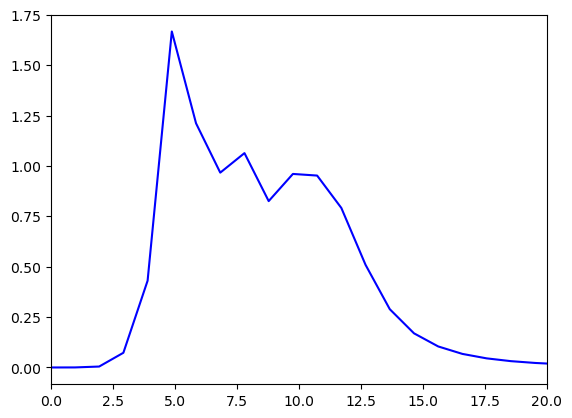

In [12]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return ss.butter(order, [lowcut, highcut], fs=fs, btype='band')

a,b = butter_bandpass(4,12,fs=1000)
w,h = ss.freqz(a,b,fs=1000)
plt.plot(w, abs(h), 'b')
plt.xlim(0,20)
plt.show()

We are see that this filter is not doign a good job. We want our filter to be flat at our banded frequecies and there is a spike at 5Hz for this filter.

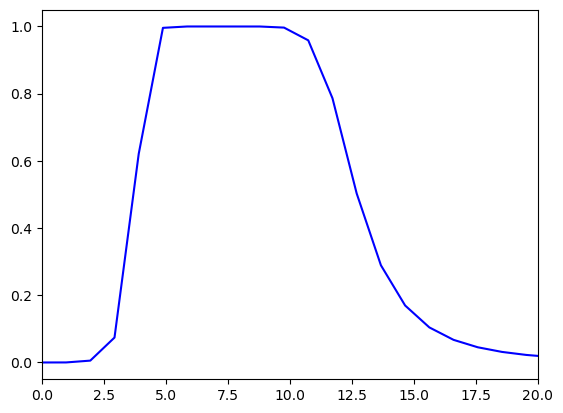

In [15]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return ss.butter(order, [lowcut, highcut], fs=fs, btype='band', output='sos')


sos = butter_bandpass(4, 12, fs=1000)
w, h = ss.sosfreqz(sos,fs=1000)
plt.plot(w, abs(h), 'b')
plt.xlim(0,20)
plt.show()

This sos filter does a much better job.